# Proyek Klasifikasi Gambar: [Diabetes National Institute of Diabetes and Digestive and Kidney]
- **Nama:** I Dewa Gede Mahesta Parawangsa
- **Email:** dewamahesta2711@gmail.com
- **ID Dicoding:** demahesta

## Import Semua Packages/Library yang Digunakan

In [2]:
pip install Lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 692.3/692.3 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.1 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files
from sklearn.feature_selection import SelectKBest, f_classif
from lazypredict.Supervised import LazyClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

## Data Preparation

### Data Loading

In [4]:
# Define the filename
file_name = 'diabetes.csv'
try:
    df = pd.read_csv(file_name)

    # Display the first 5 rows of the DataFrame to verify it loaded correctly
    print(f"Successfully loaded '{file_name}'. Displaying the first 5 rows:")
    print(df.head())

except FileNotFoundError:
    # Handle the case where the file wasn't found
    print(f"Error: File not found.")
    print(f"Please make sure '{file_name}' is uploaded to the Colab session storage.")
    print("Follow the upload instructions in the code comments.")

Successfully loaded 'diabetes.csv'. Displaying the first 5 rows:
   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0 33.60   
1   2            1       85             66             29        0 26.60   
2   3            8      183             64              0        0 23.30   
3   4            1       89             66             23       94 28.10   
4   5            0      137             40             35      168 43.10   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.63   50        1  
1                      0.35   31        0  
2                      0.67   32        1  
3                      0.17   21        0  
4                      2.29   33        1  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [6]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.60,0.63,50,1
1,2,1,85,66,29,0,26.60,0.35,31,0
2,3,8,183,64,0,0,23.30,0.67,32,1
3,4,1,89,66,23,94,28.10,0.17,21,0
4,5,0,137,40,35,168,43.10,2.29,33,1


In [7]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.00,2768.00,2768.00,2768.00,2768.00,2768.00,2768.00,2768.00,2768.00,2768.00
mean,1384.50,3.74,121.10,69.13,20.82,80.13,32.14,0.47,33.13,0.34
std,799.20,3.32,32.04,19.23,16.06,112.30,8.08,0.33,11.78,0.48
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,692.75,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,1384.50,3.00,117.00,72.00,23.00,37.00,32.20,0.38,29.00,0.00
75%,2076.25,6.00,141.00,80.00,32.00,130.00,36.62,0.62,40.00,1.00
max,2768.00,17.00,199.00,122.00,110.00,846.00,80.60,2.42,81.00,1.00


### Data Preprocessing

#### Cleaning

In [8]:
print("\nJumlah Nilai 0 dalam Setiap Kolom:")
zero_counts = (df == 0).sum()
print(zero_counts)


Jumlah Nilai 0 dalam Setiap Kolom:
Id                             0
Pregnancies                  412
Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1816
dtype: int64


In [9]:
invalid_zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[invalid_zero_columns] = df[invalid_zero_columns].replace(0, np.nan)

In [10]:
imputer = IterativeImputer(
    max_iter=10,
    random_state=42
)

# Only impute on columns that previously contained NaN
df[invalid_zero_columns] = imputer.fit_transform(df[invalid_zero_columns])

# Recheck the number of 0 (or NaN) values after imputation
print("\nJumlah Nilai Kosong Setelah Imputasi:")
print(df[invalid_zero_columns].isna().sum())


Jumlah Nilai Kosong Setelah Imputasi:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [11]:
# Checking for duplicates
duplicates = df.duplicated().sum()
print(f"\nJumlah Baris Duplikat: {duplicates}")

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Rechecking the number of duplicate rows
duplicates_after = df.duplicated().sum()
print(f"Jumlah Baris Duplikat Setelah Penghapusan: {duplicates_after}")


Jumlah Baris Duplikat: 0
Jumlah Baris Duplikat Setelah Penghapusan: 0


In [12]:
# Display the first few rows of the dataset after cleaning
print("\nData Setelah Cleaning:")
print(df.head())

# Save the cleaned dataset to a new file
df.to_csv('diabetes.csv', index=False)


Data Setelah Cleaning:
   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6   148.00          72.00          35.00   205.02 33.60   
1   2            1    85.00          66.00          29.00    67.23 26.60   
2   3            8   183.00          64.00          21.62   258.09 23.30   
3   4            1    89.00          66.00          23.00    94.00 28.10   
4   5            0   137.00          40.00          35.00   168.00 43.10   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.63   50        1  
1                      0.35   31        0  
2                      0.67   32        1  
3                      0.17   21        0  
4                      2.29   33        1  


## Exploratory Data Analysis

### Categorical Data Analysis


Distribution of Outcome:
Outcome
0    1816
1     952
Name: count, dtype: int64


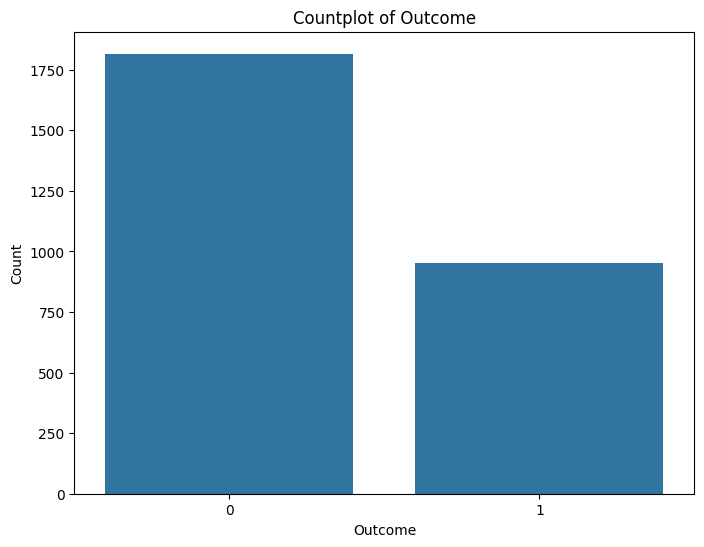


Columns in the dataset:
Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [13]:
# Check the distribution of the Outcome column
print("\nDistribution of Outcome:")
print(df['Outcome'].value_counts())

# Plot countplot for the Outcome column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Outcome')
plt.title('Countplot of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

# List all columns in the dataset
print("\nColumns in the dataset:")
print(df.columns)

### Numerical Data Analysis

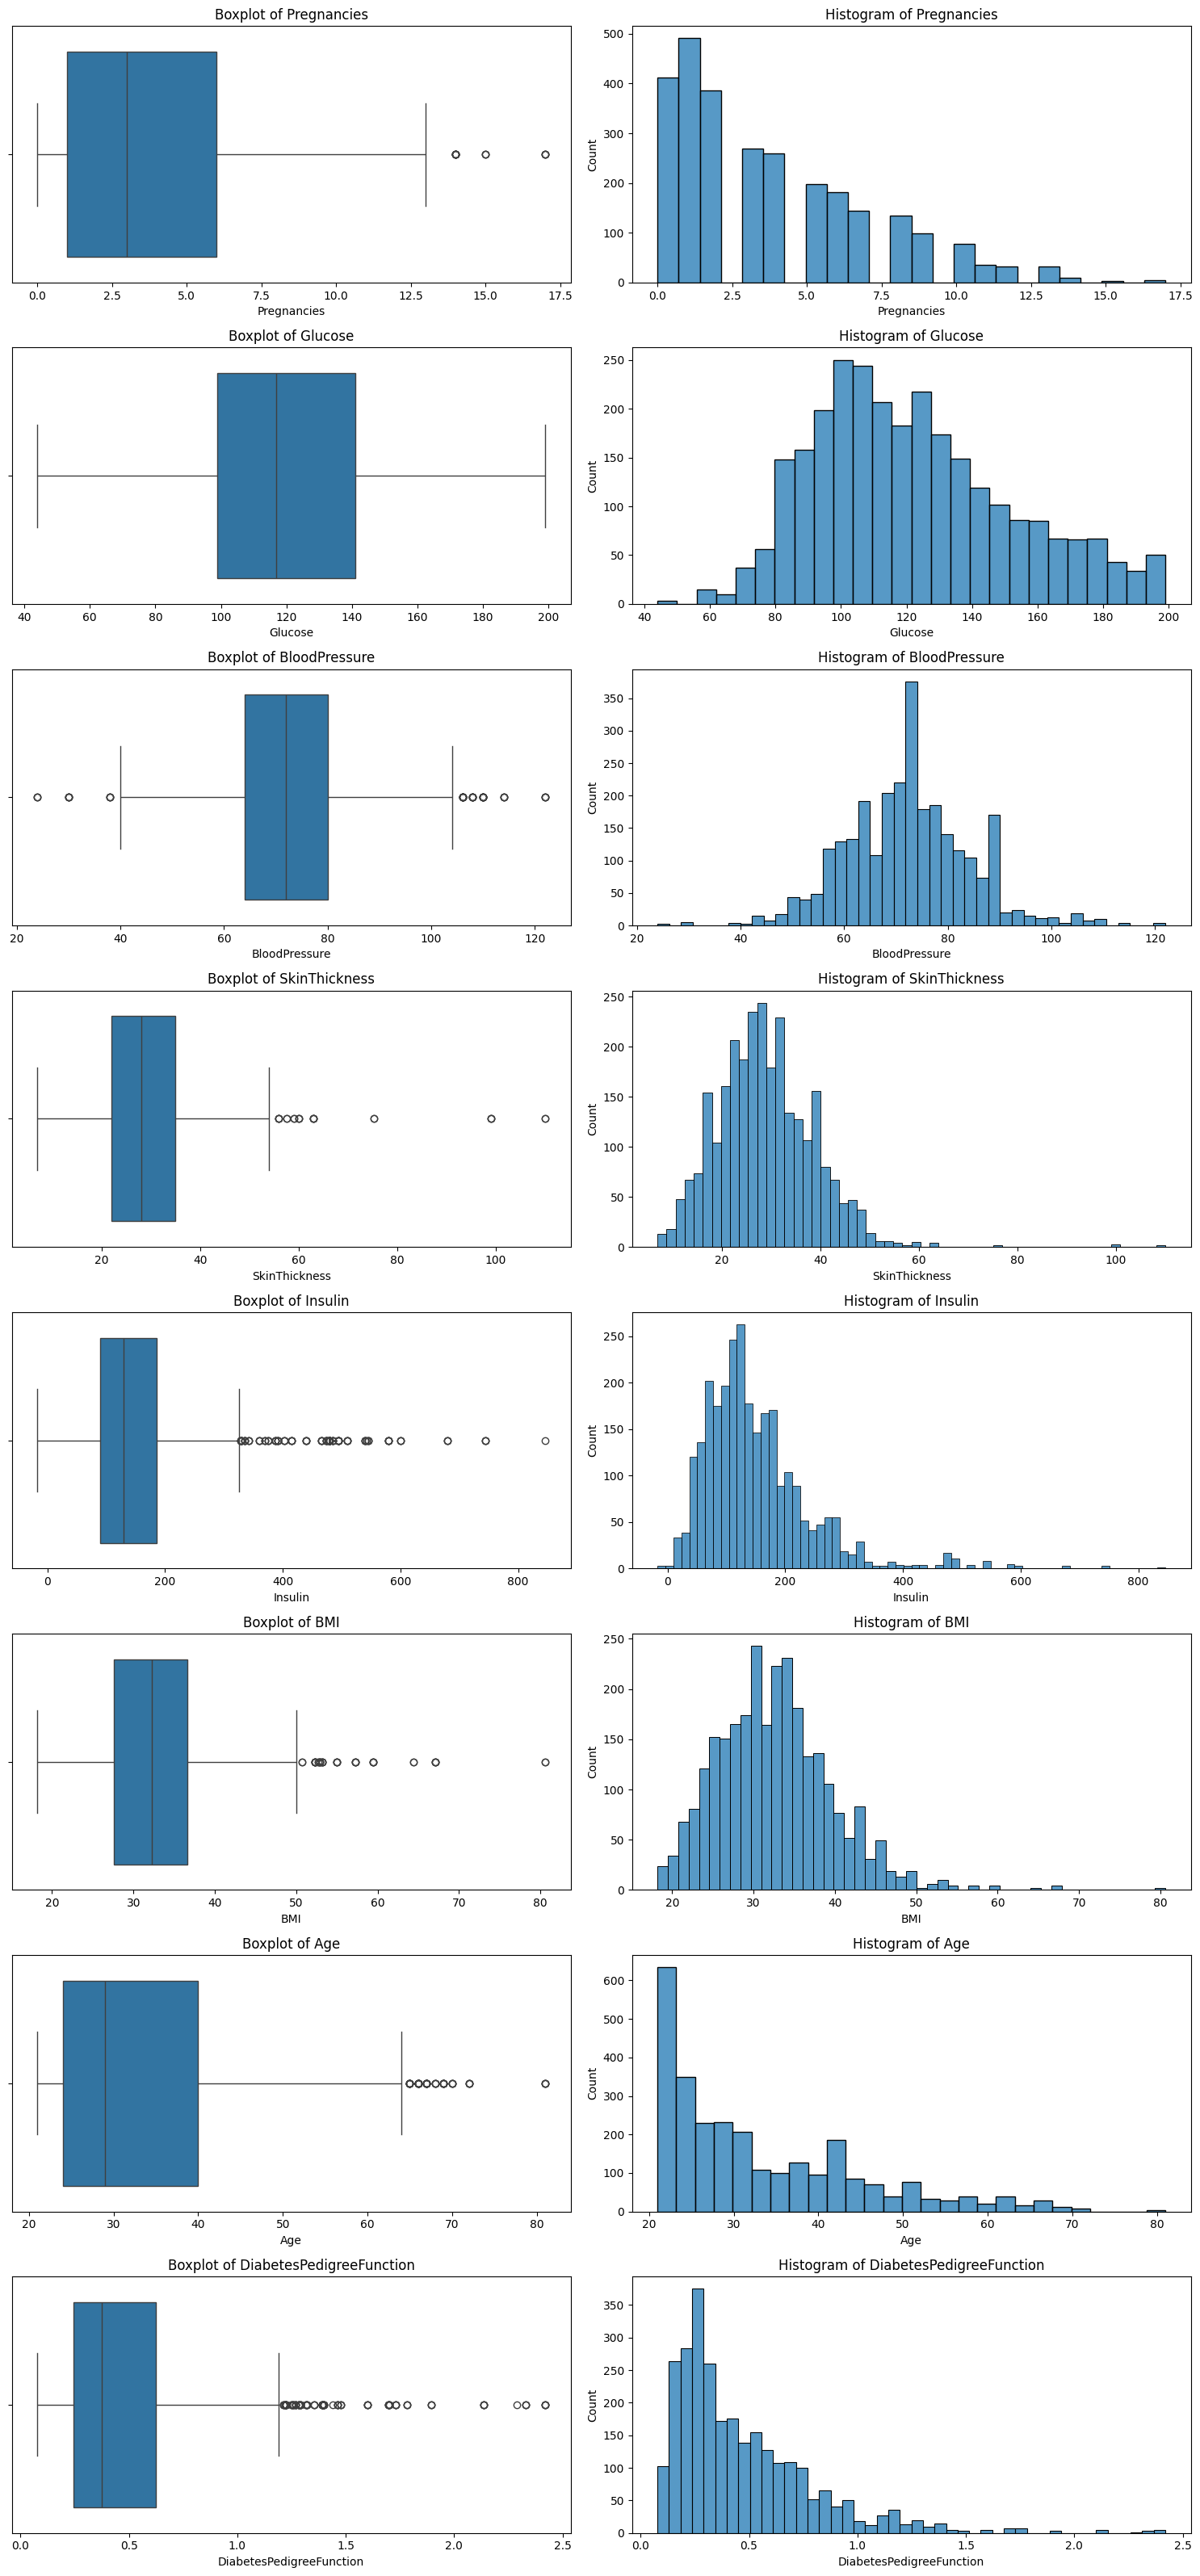

In [31]:
# Define columns to plot
columns_to_plot = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'DiabetesPedigreeFunction']

# Create subplots for boxplots and histograms
num_cols = len(columns_to_plot)
fig, axes = plt.subplots(nrows=num_cols, ncols=2, figsize=(15, 4 * num_cols))

for i, column in enumerate(columns_to_plot):
    # Boxplot
    sns.boxplot(data=df, x=column, ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot of {column}')
    axes[i, 0].set_xlabel(column)

    # Histogram
    sns.histplot(data=df[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Histogram of {column}')
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [15]:
# Function to identify outliers based on specified thresholds
def identify_outliers(df, column, lower_bound=None, upper_bound=None):
    mask = pd.Series(False, index=df.index)
    if lower_bound is not None:
        mask |= df[column] < lower_bound
    if upper_bound is not None:
        mask |= df[column] > upper_bound
    return df[mask]

# Function to remove outliers based on specified method and threshold
def remove_outliers(df, column, lower_bound=None, upper_bound=None):
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [16]:
# Define columns to check for outliers
columns_to_check = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

# Define custom bounds for each column
custom_bounds = {
    'BloodPressure': {'lower': 0, 'upper': 200},
    'SkinThickness': {'lower': 0, 'upper': 100},
    'Insulin': {'lower': 0, 'upper': 850},
    'BMI': {'lower': 0, 'upper': 70},
    'Age': {'lower': 0, 'upper': 100},
}

# Display information about outliers for each specified column
for column in columns_to_check:
    lower_bound = custom_bounds[column]['lower']
    upper_bound = custom_bounds[column]['upper']

    outliers = identify_outliers(df, column, lower_bound=lower_bound, upper_bound=upper_bound)

    print(f"\nOutliers in {column}:")
    print(outliers)
    print(f"Total outliers in {column}: {outliers.shape[0]}")


Outliers in BloodPressure:
Empty DataFrame
Columns: [Id, Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Total outliers in BloodPressure: 0

Outliers in SkinThickness:
        Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2336  2337            3   162.00          88.37         110.00   215.00 48.70   
2359  2360            3   162.00          88.37         110.00   215.00 48.70   

      DiabetesPedigreeFunction  Age  Outcome  
2336                      0.52   24        0  
2359                      0.52   24        0  
Total outliers in SkinThickness: 2

Outliers in Insulin:
        Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
62      63            5    44.00          62.00          19.29   -16.97 25.00   
830    831            5    44.00          62.00          19.29   -16.97 25.00   
2651  2652            5    44.00          62.00          19.29   -16.97 25.00 

In [17]:
# Remove outliers for each specified column using custom bounds
df_clean = df.copy()
for column in columns_to_check:
    lower_bound = custom_bounds[column]['lower']
    upper_bound = custom_bounds[column]['upper']

    df_clean = remove_outliers(df_clean, column, lower_bound=lower_bound, upper_bound=upper_bound)

# Display the first few rows of the dataset after removing outliers
print("\nFirst few rows of the dataset after removing outliers:")
print(df_clean.head())


First few rows of the dataset after removing outliers:
   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6   148.00          72.00          35.00   205.02 33.60   
1   2            1    85.00          66.00          29.00    67.23 26.60   
2   3            8   183.00          64.00          21.62   258.09 23.30   
3   4            1    89.00          66.00          23.00    94.00 28.10   
4   5            0   137.00          40.00          35.00   168.00 43.10   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.63   50        1  
1                      0.35   31        0  
2                      0.67   32        1  
3                      0.17   21        0  
4                      2.29   33        1  


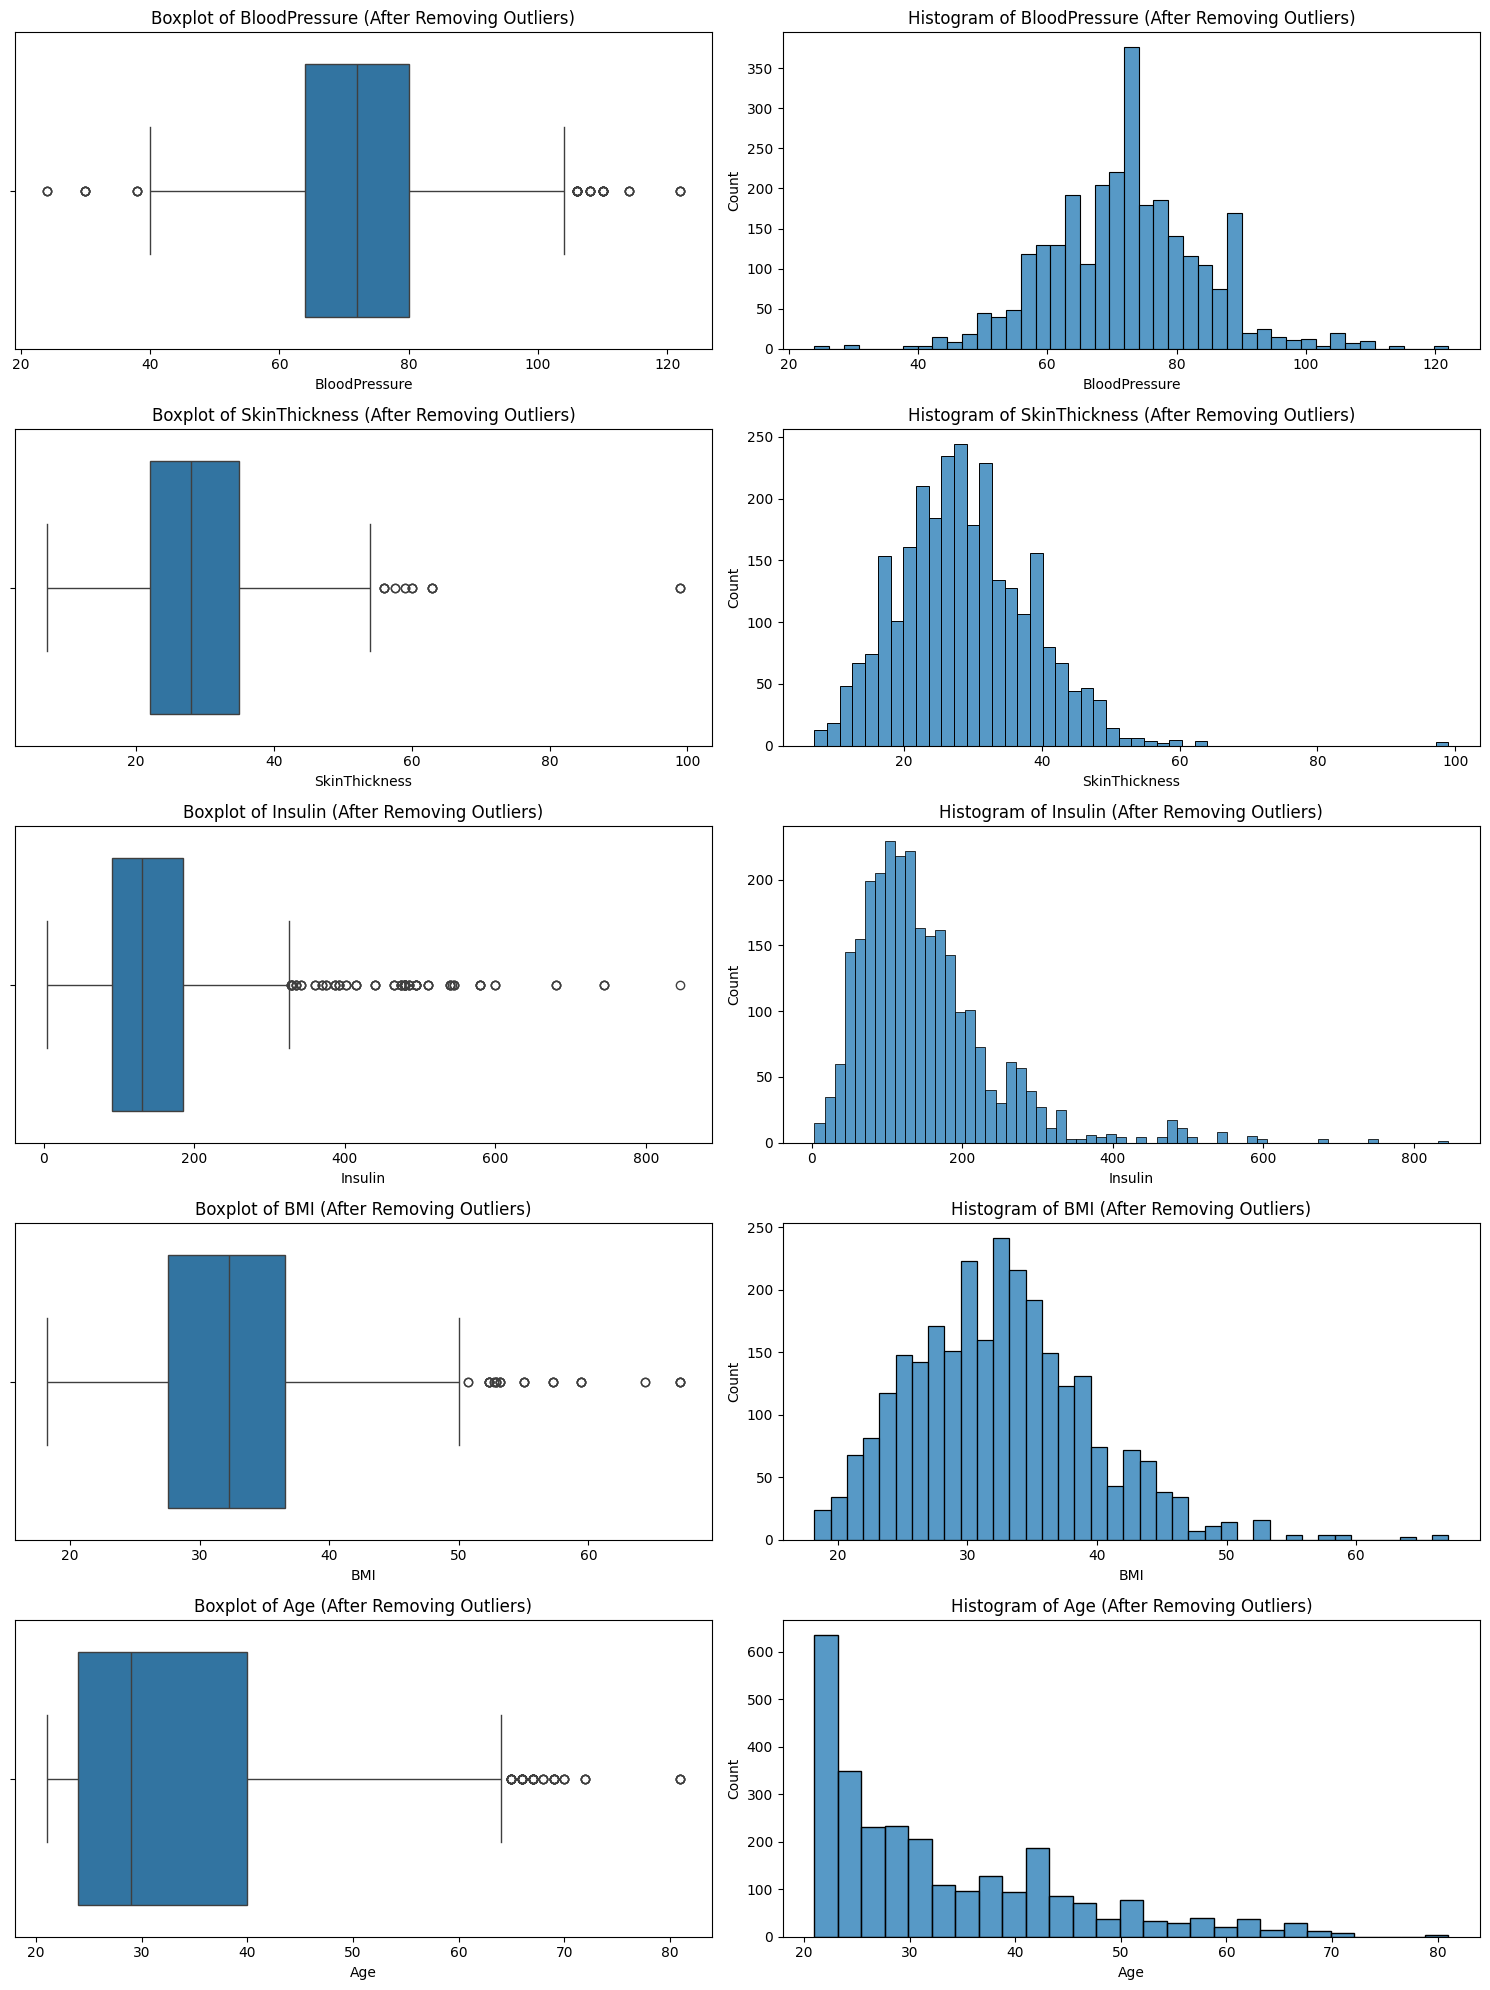

In [18]:
# Check the distribution of each column using boxplots and histograms
fig, axes = plt.subplots(nrows=len(columns_to_check), ncols=2, figsize=(15, 4 * len(columns_to_check)))

for i, column in enumerate(columns_to_check):
    # Boxplot
    sns.boxplot(data=df_clean, x=column, ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot of {column} (After Removing Outliers)')
    axes[i, 0].set_xlabel(column)

    # Histogram
    sns.histplot(data=df_clean[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Histogram of {column} (After Removing Outliers)')
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

Numerical Columns: Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


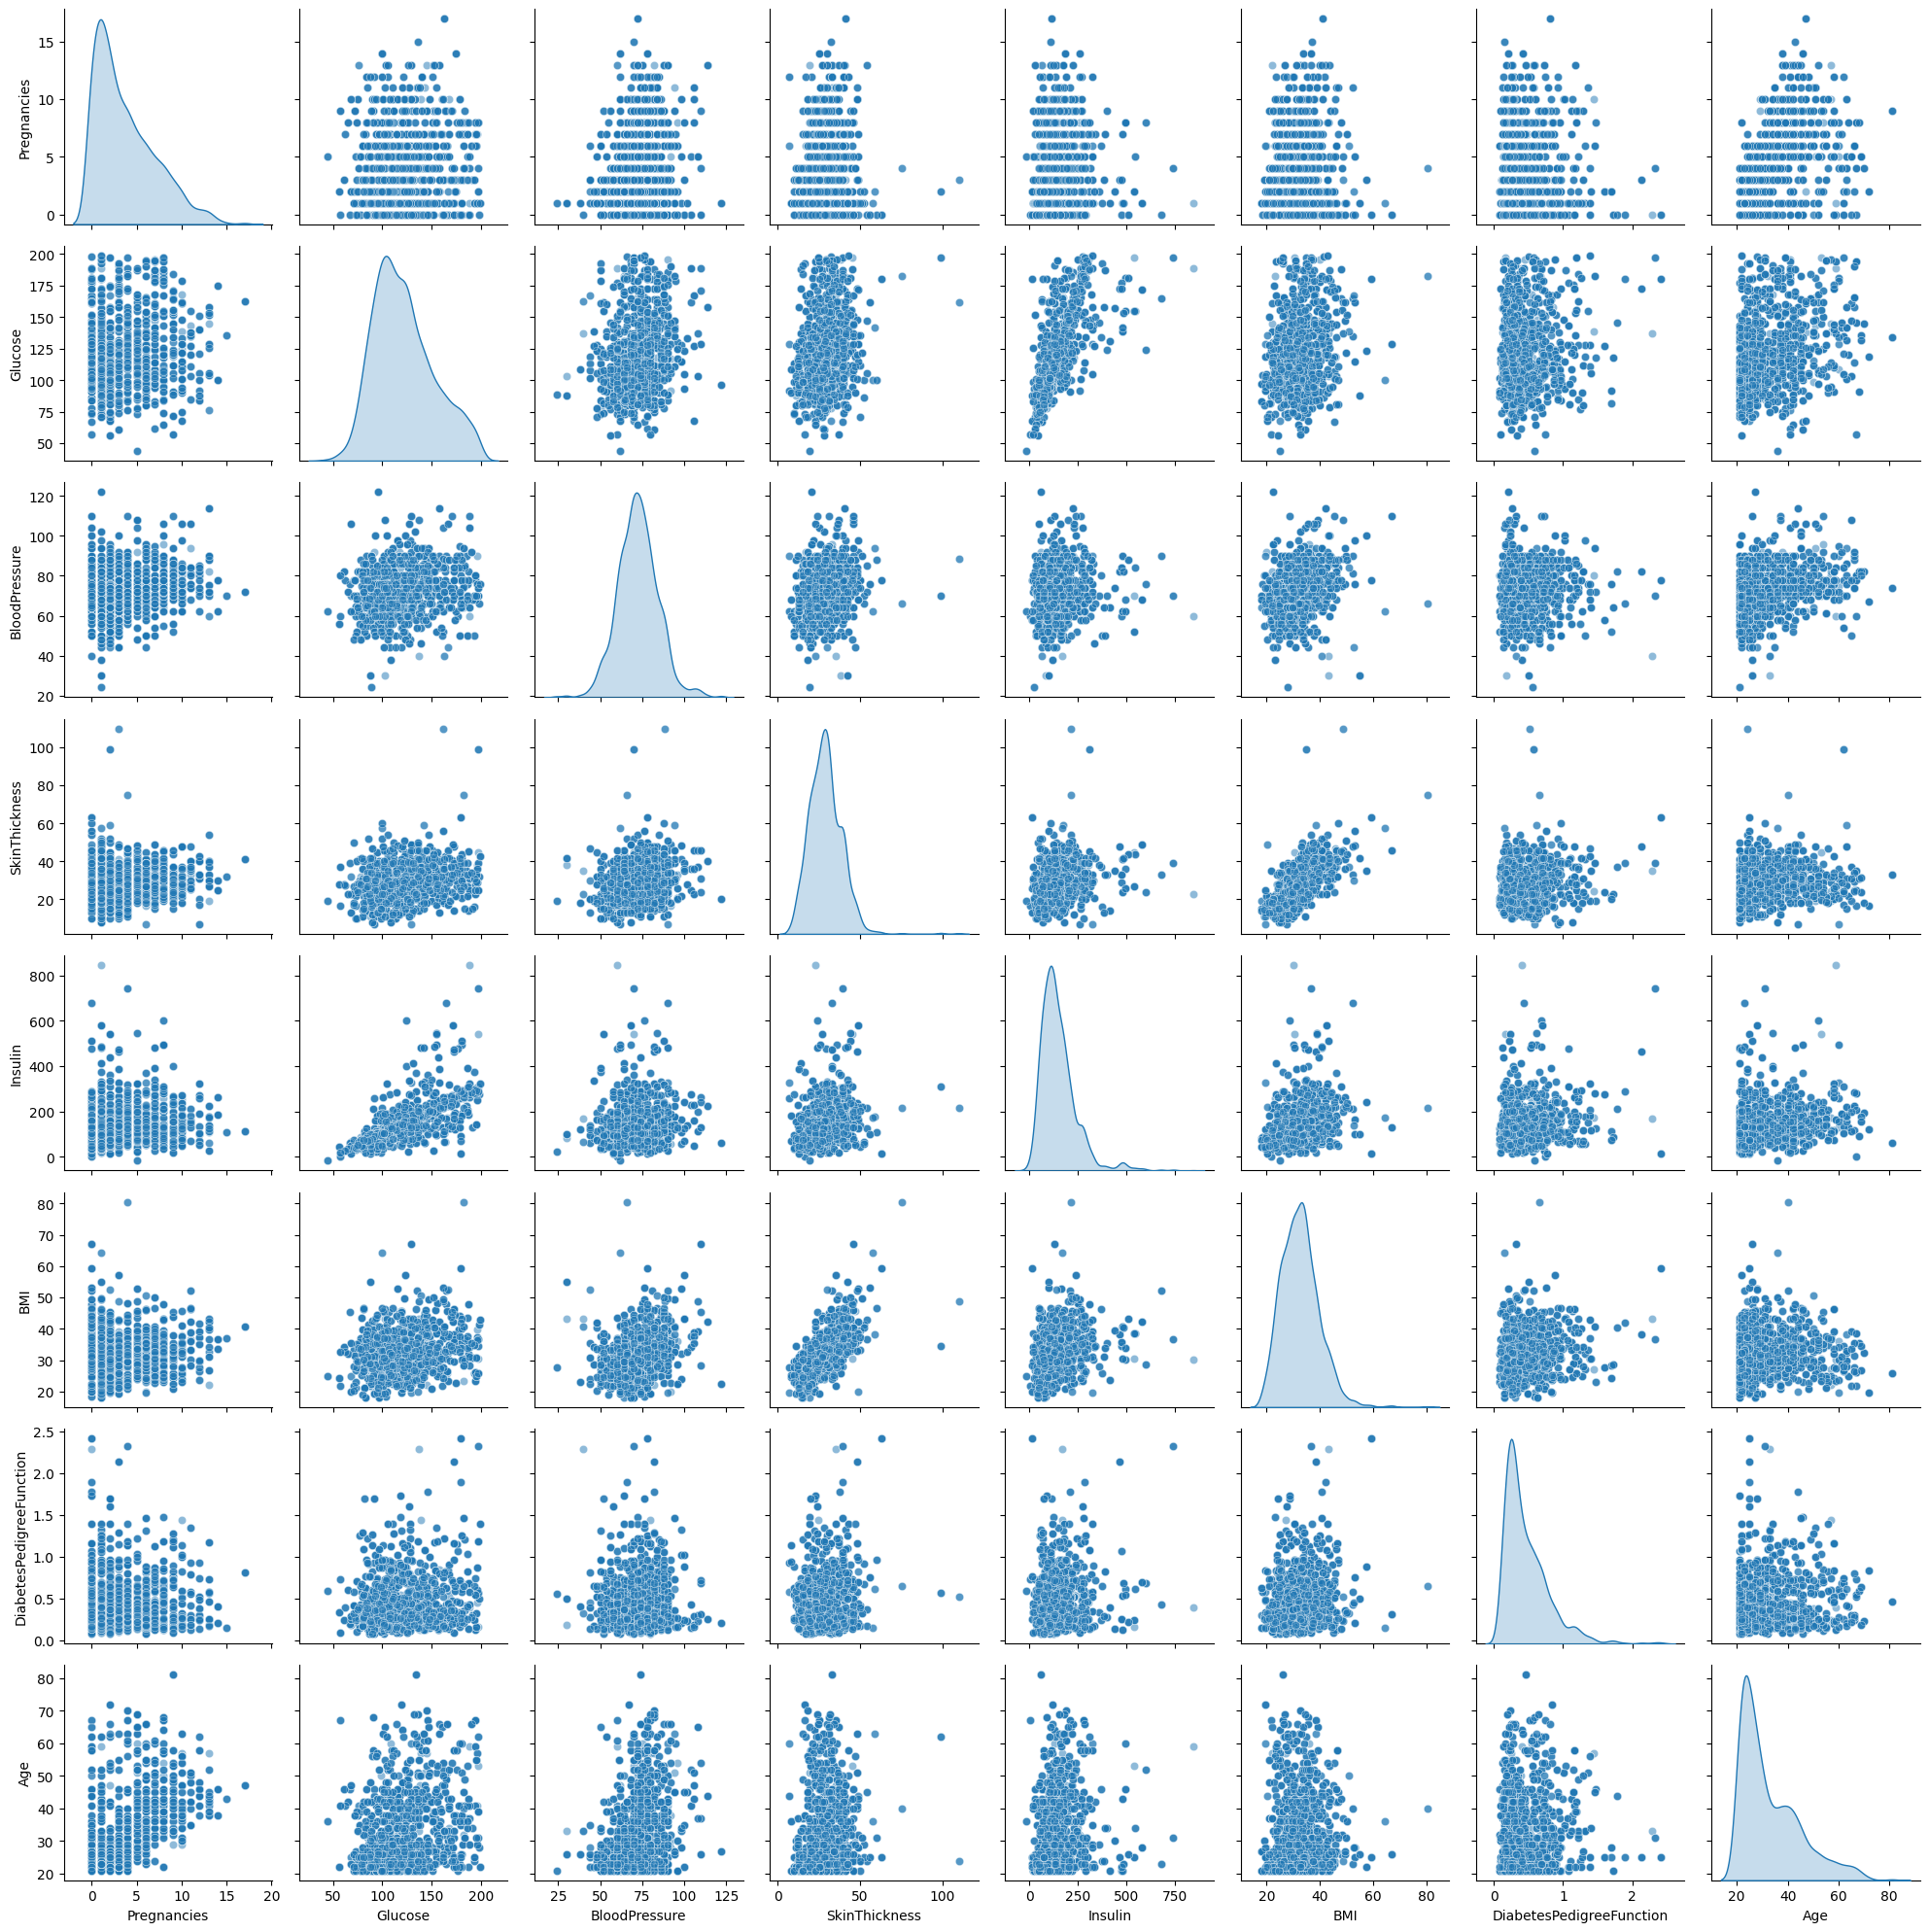

In [19]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
print("Numerical Columns:", numerical_cols)

# Exclude the 'Outcome' and 'id' columns if they exist
numerical_cols = numerical_cols.drop('Outcome', errors='ignore')
numerical_cols = numerical_cols.drop('Id', errors='ignore')

# Create a pairplot for the numerical columns
sns.pairplot(
    df[numerical_cols],
    diag_kind='kde',
    plot_kws={'alpha': 0.5},
    height=2.5
)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Correlation Matrix:


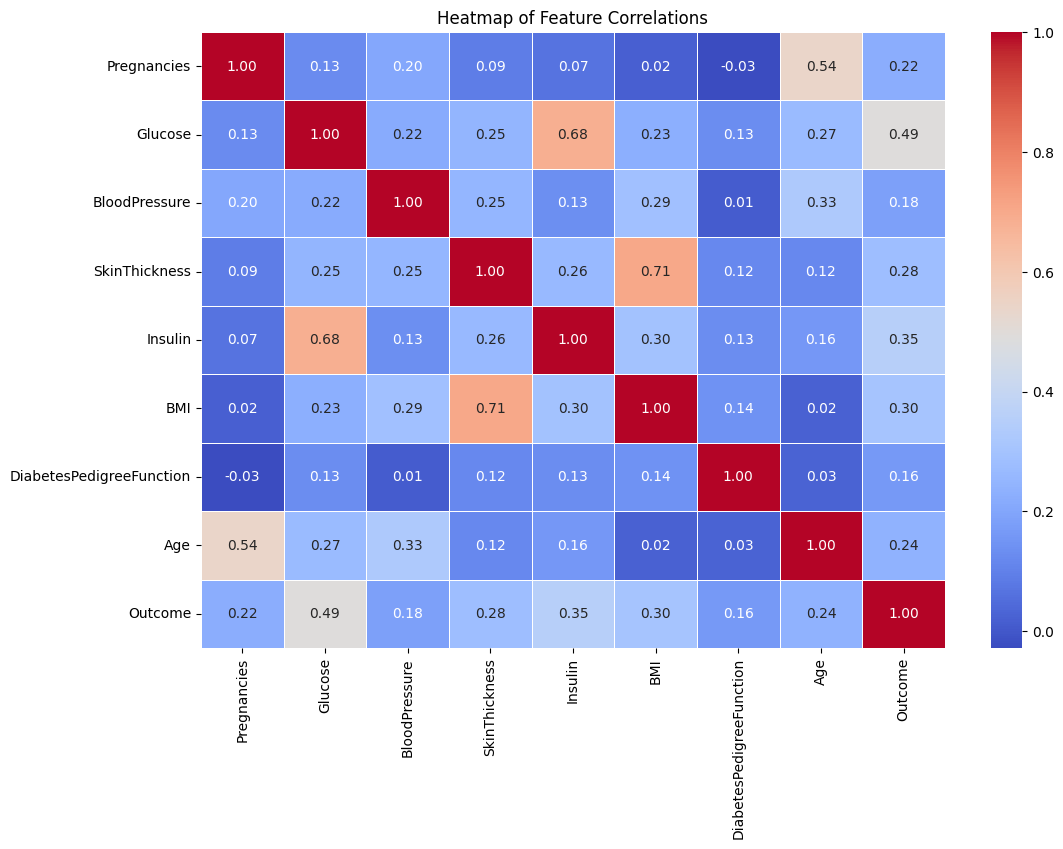

In [20]:
# Select only numerical columns and drop the 'Id' column if it exists
numerical_cols = df_clean.select_dtypes(include=['number']).columns
numerical_cols = numerical_cols.drop('Id', errors='ignore')

# Filter the DataFrame to include only the selected numerical columns
df_clean = df_clean[numerical_cols]

# Calculate the correlation matrix
corr_matrix = df_clean.corr()

# Display the correlation matrix
print("Correlation Matrix:")

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title('Heatmap of Feature Correlations')
plt.show()

In [21]:
# Separate features and target variable, dropping 'Id' if it exists
X = df_clean.drop(['Outcome', 'Id'], axis=1, errors='ignore')
y = df_clean['Outcome']

## Split Dataset

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("\nShapes of the datasets:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")


Shapes of the datasets:
X_train: (2208, 8)
X_test: (553, 8)
y_train: (2208,)
y_test: (553,)


In [23]:
#SMOTE for balance 2 class
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

## Modelling

In [24]:
#Lazy Classifier Method for ML Comparison
clf = LazyClassifier(
    verbose=0,
    ignore_warnings=True,
    custom_metric=None
)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 1432, number of negative: 1432
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1560
[LightGBM] [Info] Number of data points in the train set: 2864, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
DecisionTreeClassifier             1.00               1.00     1.00      1.00   
LGBMClassifier                     1.00               1.00     1.00      1.00   
XGBClassifier                      1.00               1.00     1.00      1.00   
BaggingClassifier                  0.99               0.99     0.99      0.99   
ExtraTreeClassifier                0.99               0.99     0.99      0.99  

In [25]:
# Define the models and respective hyperparameter grids
models = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'LGBM': {
        'model': LGBMClassifier(verbosity=-1),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'num_leaves': [20, 31, 40]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.6, 0.8, 1.0]
        }
    }
}

## Evaluasi dan Visualisasi

In [26]:
# Lists to store evaluation metrics
accuracies = []
train_accuracies = []
best_params_list = []
classification_reports = []
confusion_matrices = []

# Train and evaluate each model
for model_name, model_info in models.items():
    print(f"\n--- {model_name} ---")

    # Initialize GridSearchCV with return_train_score
    clf = GridSearchCV(
        estimator=model_info['model'],
        param_grid=model_info['params'],
        scoring='accuracy',
        cv=5,
        return_train_score=True,
        verbose=0
    )

    # Fit GridSearchCV
    clf.fit(X_train, y_train)

    # Simpan hasil CV ke DataFrame
    results = pd.DataFrame(clf.cv_results_)
    print("\nCV results (train vs test):")
    print(results[['mean_train_score', 'mean_test_score', 'std_test_score']])

    # Get best model and parameters
    best_model = clf.best_estimator_
    best_params = clf.best_params_

    # Evaluate on training set
    y_train_pred = best_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Evaluate on test set
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Save metrics
    accuracies.append((model_name, accuracy))
    train_accuracies.append((model_name, train_accuracy))
    best_params_list.append((model_name, best_params))
    classification_reports.append((model_name, classification_report(y_test, y_pred, output_dict=True)))
    confusion_matrices.append((model_name, confusion_matrix(y_test, y_pred)))

    # Show summary
    print(f"\nBest Parameters: {best_params}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



--- DecisionTree ---

CV results (train vs test):
    mean_train_score  mean_test_score  std_test_score
0               1.00             0.97            0.01
1               1.00             0.96            0.01
2               0.98             0.94            0.01
3               0.99             0.95            0.01
4               0.99             0.95            0.01
..               ...              ...             ...
67              0.99             0.96            0.01
68              0.98             0.95            0.01
69              0.98             0.94            0.01
70              0.98             0.94            0.01
71              0.97             0.93            0.02

[72 rows x 3 columns]

Best Parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 0.9964

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1    

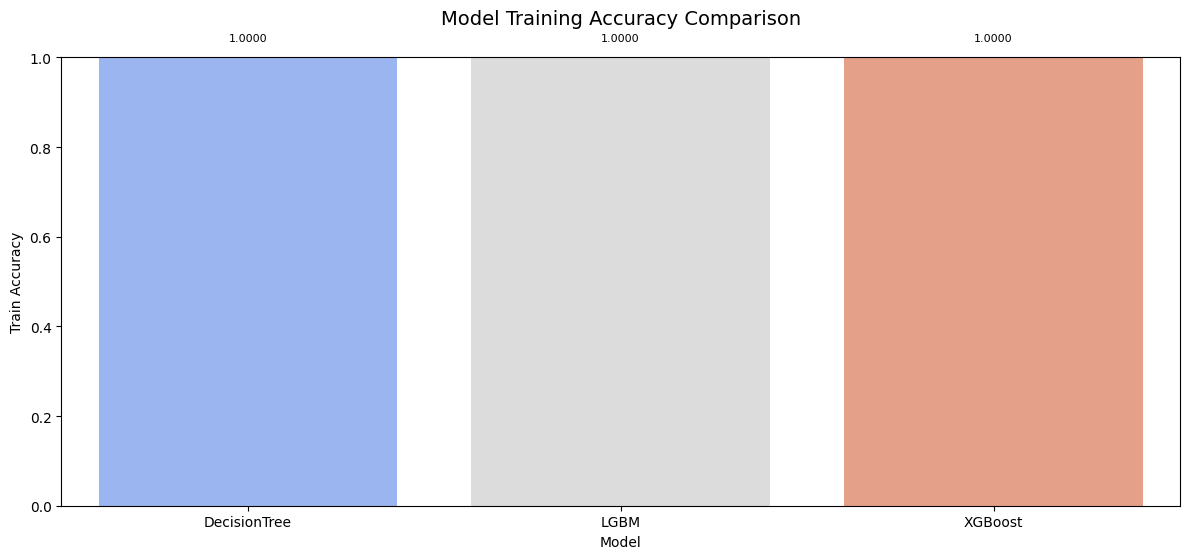

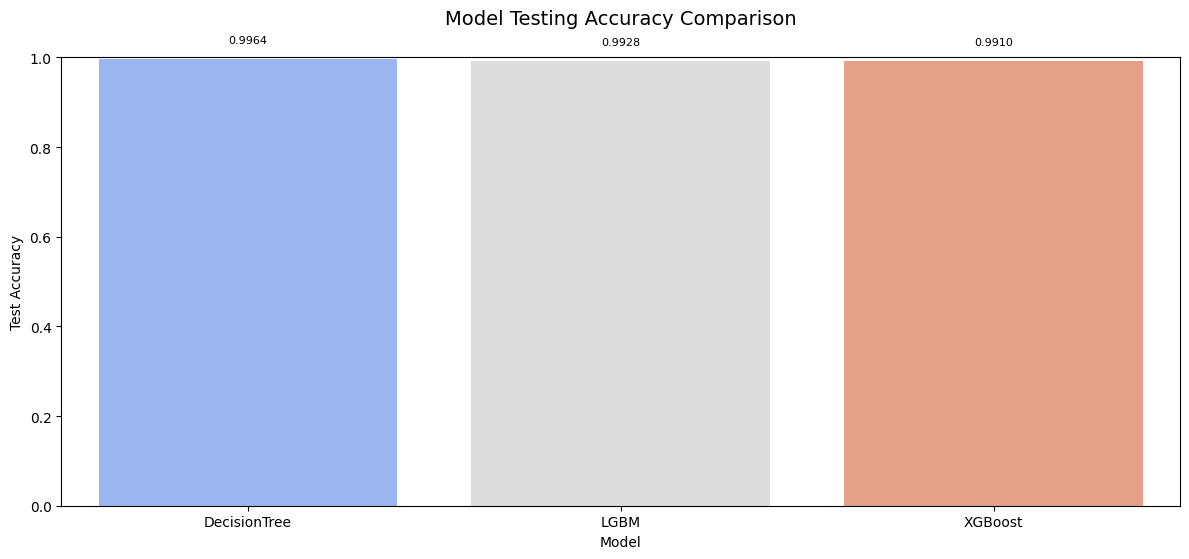

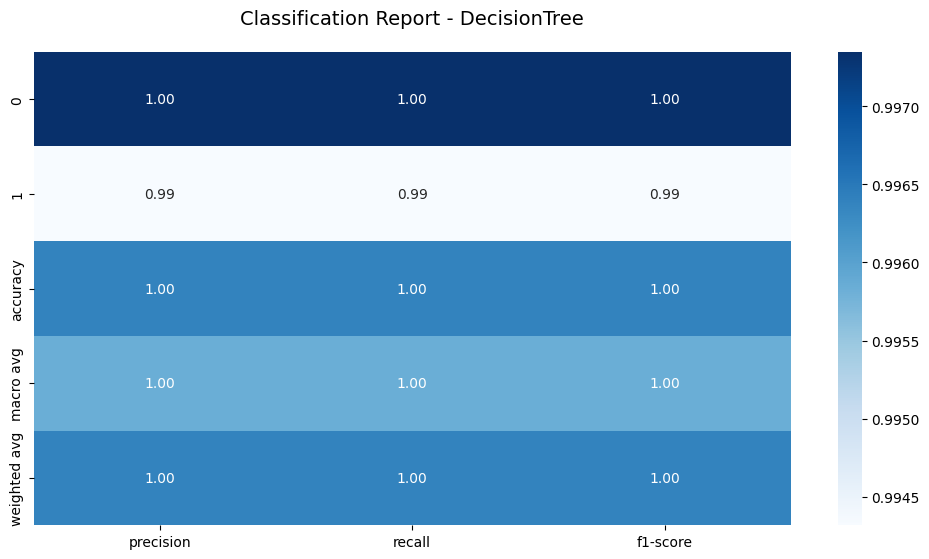

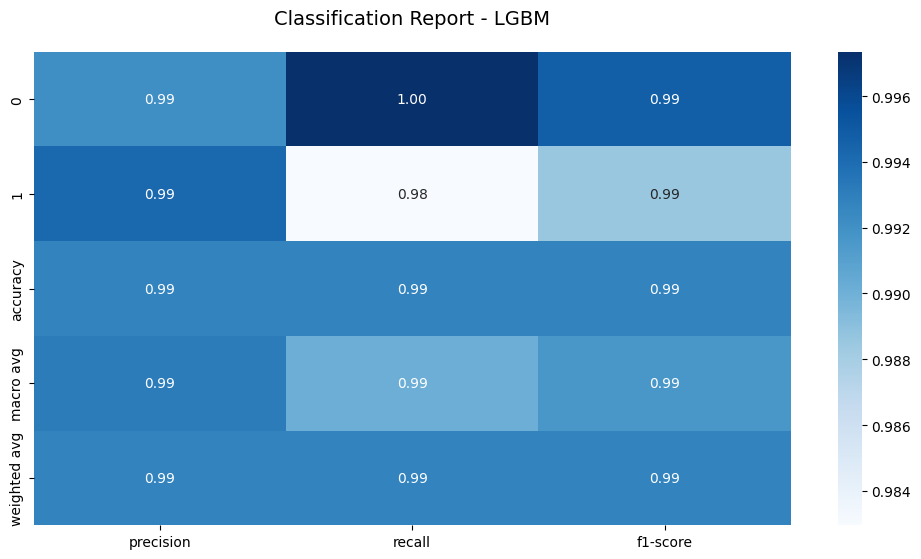

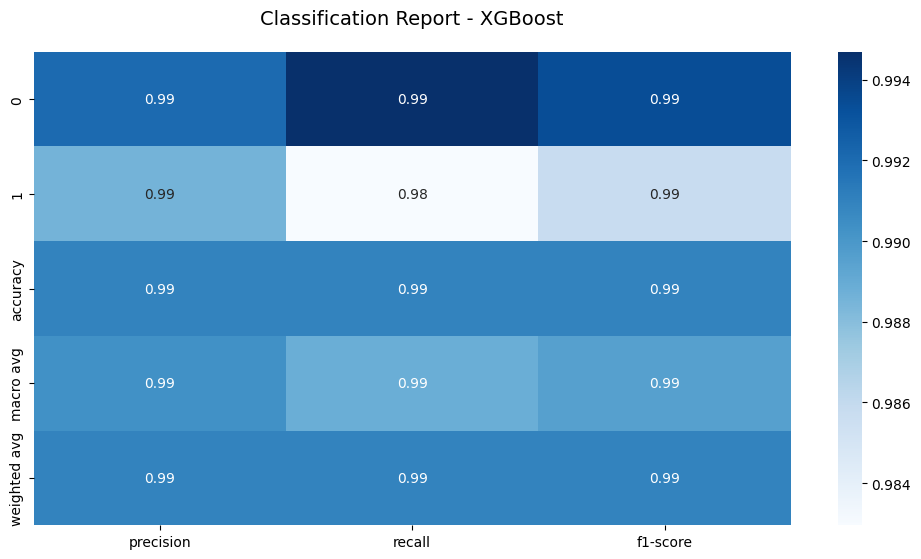

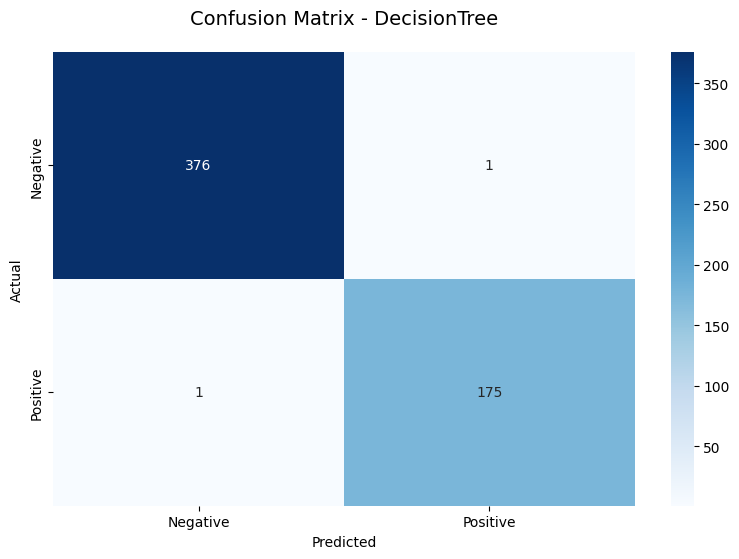

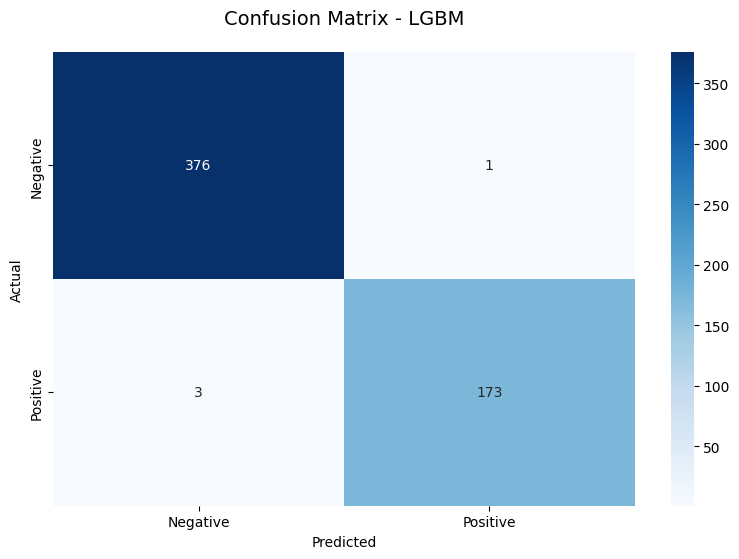

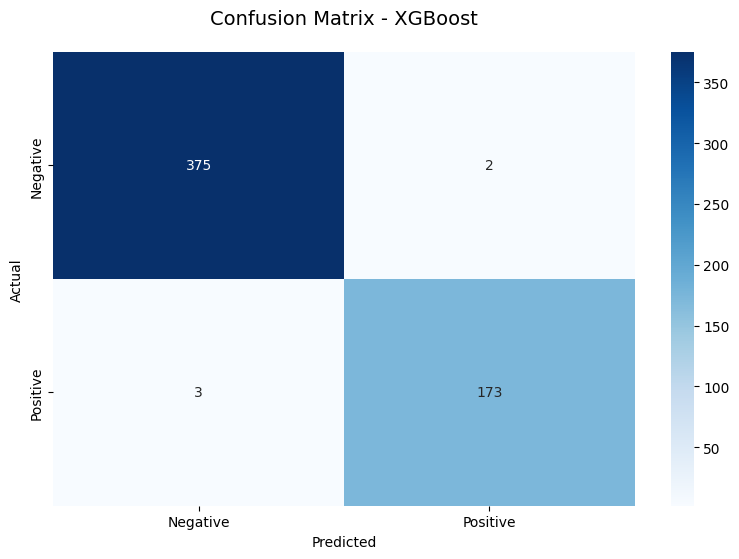

In [34]:
# Convert accuracies to DataFrame
accuracies_df = pd.DataFrame(accuracies, columns=['Model', 'Test Accuracy'])
train_accuracies_df = pd.DataFrame(train_accuracies, columns=['Model', 'Train Accuracy'])

# Function to add annotations to bar plot
def annotate_bars(ax):
    for p in ax.patches:
        height = p.get_height()
        # Adjust the position of the annotation
        ax.annotate(f'{height:.4f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    xytext=(0, 10), textcoords='offset points',
                    fontsize=8)

# Plot accuracy comparison for training and testing separately
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=train_accuracies_df, x='Model', y='Train Accuracy', palette='coolwarm')
annotate_bars(ax)
plt.title('Model Training Accuracy Comparison', fontsize=14, pad=24)
plt.ylim(0, 1.0)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=accuracies_df, x='Model', y='Test Accuracy', palette='coolwarm')
annotate_bars(ax)
plt.title('Model Testing Accuracy Comparison', fontsize=14, pad=24)
plt.ylim(0, 1.0)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Plot classification reports
for model_name, report in classification_reports:
    plt.figure(figsize=(10, 6))
    sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues', fmt='.2f')
    plt.title(f'Classification Report - {model_name}', fontsize=14, pad=20)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Plot confusion matrices
for model_name, cm in confusion_matrices:
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14, pad=20)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()